In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
% matplotlib inline
data_link= './2d-em.csv' 
data = pd.read_csv(data_link,header=None).as_matrix()

In [9]:
# init
#parameters
nb_center= 3
rand_row=np.random.rand(nb_center)* data.shape[0]
centers_list= data[list(map(int,rand_row)),:]

In [10]:
def get_xy(data):
    x = data[:,0]
    y = data[:,1]
    return x,y


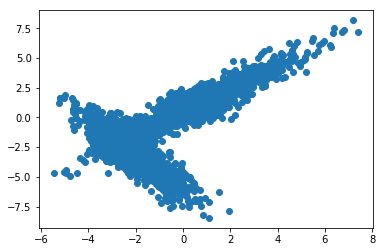

In [16]:
x,y = get_xy(data)
plt.scatter(x, y)

In [29]:
class em_cluster():
    def fit(self, k, X, num_iteration, measure = 'M'):
        
        # covariance matrix dictionary
        self.covmatrix_dict = {}
        for i in range(k):
            self.covmatrix_dict[i] = np.identity(X.shape[1])
        
        
        # mean dictionary
        self.mean_dict = {}
        for i in range(k):
            index = np.random.choice(X.shape[0])
            self.mean_dict[i] = X[index]
        
        # initialize norm value list for plotting norm value plot
        self.norm_lst = []
            
        # using the Mahalanobis distance
        if measure == 'M':
            for _ in range(num_iteration):
                dist_array = np.zeros((k, X.shape[0]))
                for i in self.covmatrix_dict:
                    distance = ((X - self.mean_dict[i]).dot(np.linalg.inv(self.covmatrix_dict[i]))).dot((X-self.mean_dict[i]).T)
                    dist_array[i,:] = np.diag(distance)                
                
                cluster_lst = np.argmin(dist_array, axis = 0)
                
                sum_norm = 0
                for i in range(k):
                    self.covmatrix_dict[i] = np.cov(X[cluster_lst == i], rowvar=False)
                    self.mean_dict[i] = np.mean(X[cluster_lst == i], axis = 0)
                    sum_norm += np.linalg.norm(self.covmatrix_dict[i])
                self.norm_lst.append(sum_norm)
            
            self.result = cluster_lst
        
        # using the multivariate normal distribution
        if measure == 'N':
            for _ in range(num_iteration):
                prob_array = np.zeros((k, X.shape[0]))
                
                for i in self.covmatrix_dict:
                    # using function from scipy 
                    prob = multivariate_normal.pdf(X, self.mean_dict[i], self.covmatrix_dict[i])
                    prob_array[i,:] = prob
                    
                cluster_lst = np.argmax(prob_array, axis = 0)
                
                sum_norm = 0
                for i in range(k):
                    self.covmatrix_dict[i] = np.cov(X[cluster_lst == i], rowvar=False)
                    self.mean_dict[i] = np.mean(X[cluster_lst == i], axis = 0)
                    sum_norm += np.linalg.norm(self.covmatrix_dict[i])
                self.norm_lst.append(sum_norm)
            
            self.result = cluster_lst

In [30]:
# mahalanobis distance
#https://de.wikipedia.org/wiki/Mahalanobis-Distanz

def mahalanobis_dist(V1,V2,cov):
    V1=  np.array(V1)
    V2 =np.array(V2)
    distance= (np.transpose(V1-V2)) @ np.linalg.pinv(cov) @ (V1-V2)
    distance= np.sqrt(distance)
    return distance

#test
x=[1,2,3]
y=[1,6,3]
cov_test= np.cov(np.identity(3))


mahalanobis_dist(x,y,cov_test)




4.6188021535170058

In [42]:
# K-mean routine 

def k_mean_routine (centers, data_points): 
     
        for center_id in range (centers.shape[0])
            Zentrum= centers[center_id,:]
            
            for point in data_points:
            point=data[1,:]
            center
              map (mahalanobis_dist(x,y,cov_test),  covariance_matrix )    


SyntaxError: invalid syntax (<ipython-input-42-39a1099680b8>, line 6)

In [120]:
import matplotlib.image as mpimg

(400, 640, 3)


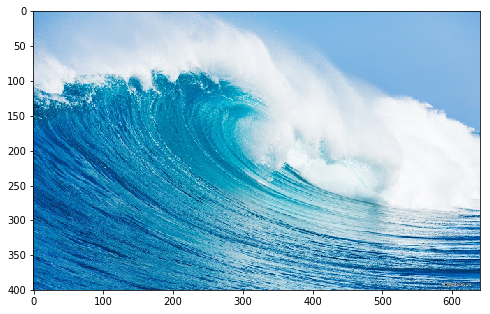

In [128]:
path = './test2.jpg'

def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    
img = mpimg.imread(path)
show_img(img)
print (img.shape)
rows = img.shape[0]
cols = img.shape[1]
img = img.reshape(img.shape[0] * img.shape[1], 3)

In [129]:
k = 20
img_cluster = em_cluster()
img_cluster.fit(k, img, num_iteration = 3, measure = 'N')

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:52: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


ValueError: array must not contain infs or NaNs

In [ ]:
img_cluster.mean_dict

In [130]:
for type_cluster in np.unique(img_cluster.result):
    img[img_cluster.result == type_cluster] = img_cluster.mean_dict[type_cluster]

AttributeError: 'em_cluster' object has no attribute 'result'

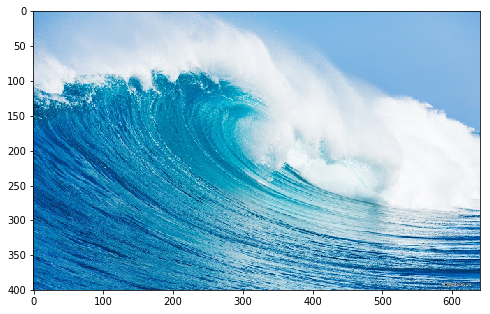

In [131]:
plt.figure
plt.figure(figsize=(8,8))
show_img(img.reshape(400, 640,3 ))